<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W3/ungraded_labs/C3_W3_Lab_5_sarcasm_with_bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Training a Sarcasm Detection Model using Bidirectional LSTMs

In this lab, you will revisit the [News Headlines Dataset for Sarcasm Detection](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/home) dataset and use it to train a Bi-LSTM Model.


## Download the Dataset

First, you will download the JSON file and extract the contents into lists.

In [15]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2024-04-22 18:09:53--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.207, 74.125.69.207, 64.233.181.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.1’

sarcasm.json.1      100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2024-04-22 18:09:53 (145 MB/s) - ‘sarcasm.json.1’ saved [5643545/5643545]



In [16]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

## Split the Dataset

You will then split the lists into train and test sets.

In [ ]:
training_size = 20000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Data preprocessing

Next, you will generate the vocabulary and padded sequences.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

## Build and Compile the Model

The architecture here is almost identical to the one you used in the previous lab with the IMDB Reviews. Try to tweak the parameters and see how it affects the training time and accuracy (both training and validation).

In [ ]:
import tensorflow as tf

# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 24

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174129 (680.19 KB)
Trainable params: 174129 (680.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf

# Parameters - double the dim parameters
embedding_dim = 16
lstm_dim = 64
dense_dim = 128

# Model Definition with LSTM
model_lstm_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               41472     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 218113 (852.00 KB)
Trainable params: 218113 (852.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the Model

In [ ]:
NUM_EPOCHS = 10

# Train the model
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 31s 39ms/step - loss: 0.4140 - accuracy: 0.7964 - val_loss: 0.3291 - val_accuracy: 0.8574
Epoch 2/10
625/625 [==============================] - 10s 17ms/step - loss: 0.2150 - accuracy: 0.9147 - val_loss: 0.3324 - val_accuracy: 0.8626
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1314 - accuracy: 0.9505 - val_loss: 0.4080 - val_accuracy: 0.8550
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0825 - accuracy: 0.9711 - val_loss: 0.4784 - val_accuracy: 0.8489
Epoch 5/10
625/625 [==============================] - 11s 17ms/step - loss: 0.0535 - accuracy: 0.9826 - val_loss: 0.5537 - val_accuracy: 0.8423
Epoch 6/10
625/625 [==============================] - 14s 23ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.6639 - val_accuracy: 0.8411
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.7719 - val_accuracy: 

In [13]:
NUM_EPOCHS = 10

# Train the model
history_lstm_1 = model_lstm_1.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 23s 31ms/step - loss: 0.4131 - accuracy: 0.7994 - val_loss: 0.3424 - val_accuracy: 0.8477
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 0.2103 - accuracy: 0.9147 - val_loss: 0.3566 - val_accuracy: 0.8585
Epoch 3/10
625/625 [==============================] - 10s 15ms/step - loss: 0.1275 - accuracy: 0.9525 - val_loss: 0.4076 - val_accuracy: 0.8493
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0767 - accuracy: 0.9739 - val_loss: 0.5414 - val_accuracy: 0.8372
Epoch 5/10
625/625 [==============================] - 9s 15ms/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.6620 - val_accuracy: 0.8383
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.7515 - val_accuracy: 0.8331
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.8540 - val_accuracy: 0.8

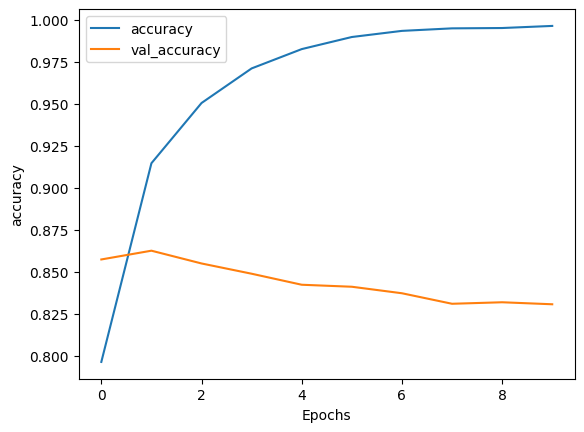

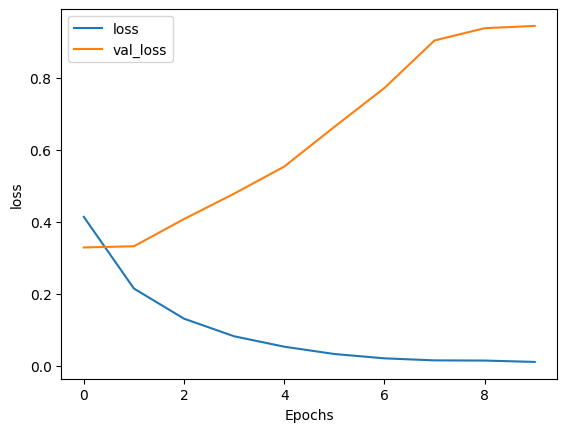

In [ ]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

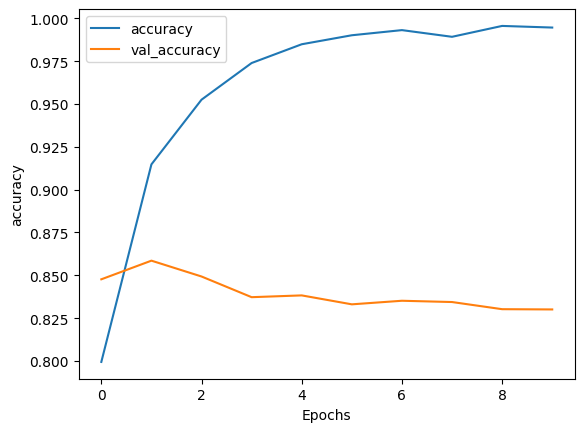

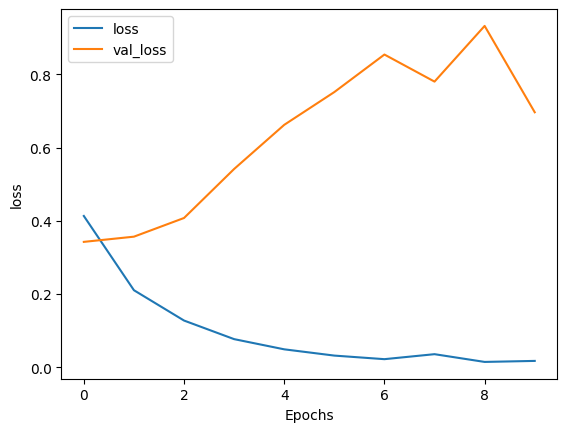

In [14]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm_1, 'accuracy')
plot_graphs(history_lstm_1, 'loss')